In [1]:


import pandas as pd
# pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# import zipfile

# with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
#     zip_ref.extractall(".")

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
Y = train_df['SalePrice']
df = train_df.drop(['Id', 'SalePrice'], axis=1)

In [ ]:
plt.figure(figsize=(14,14))



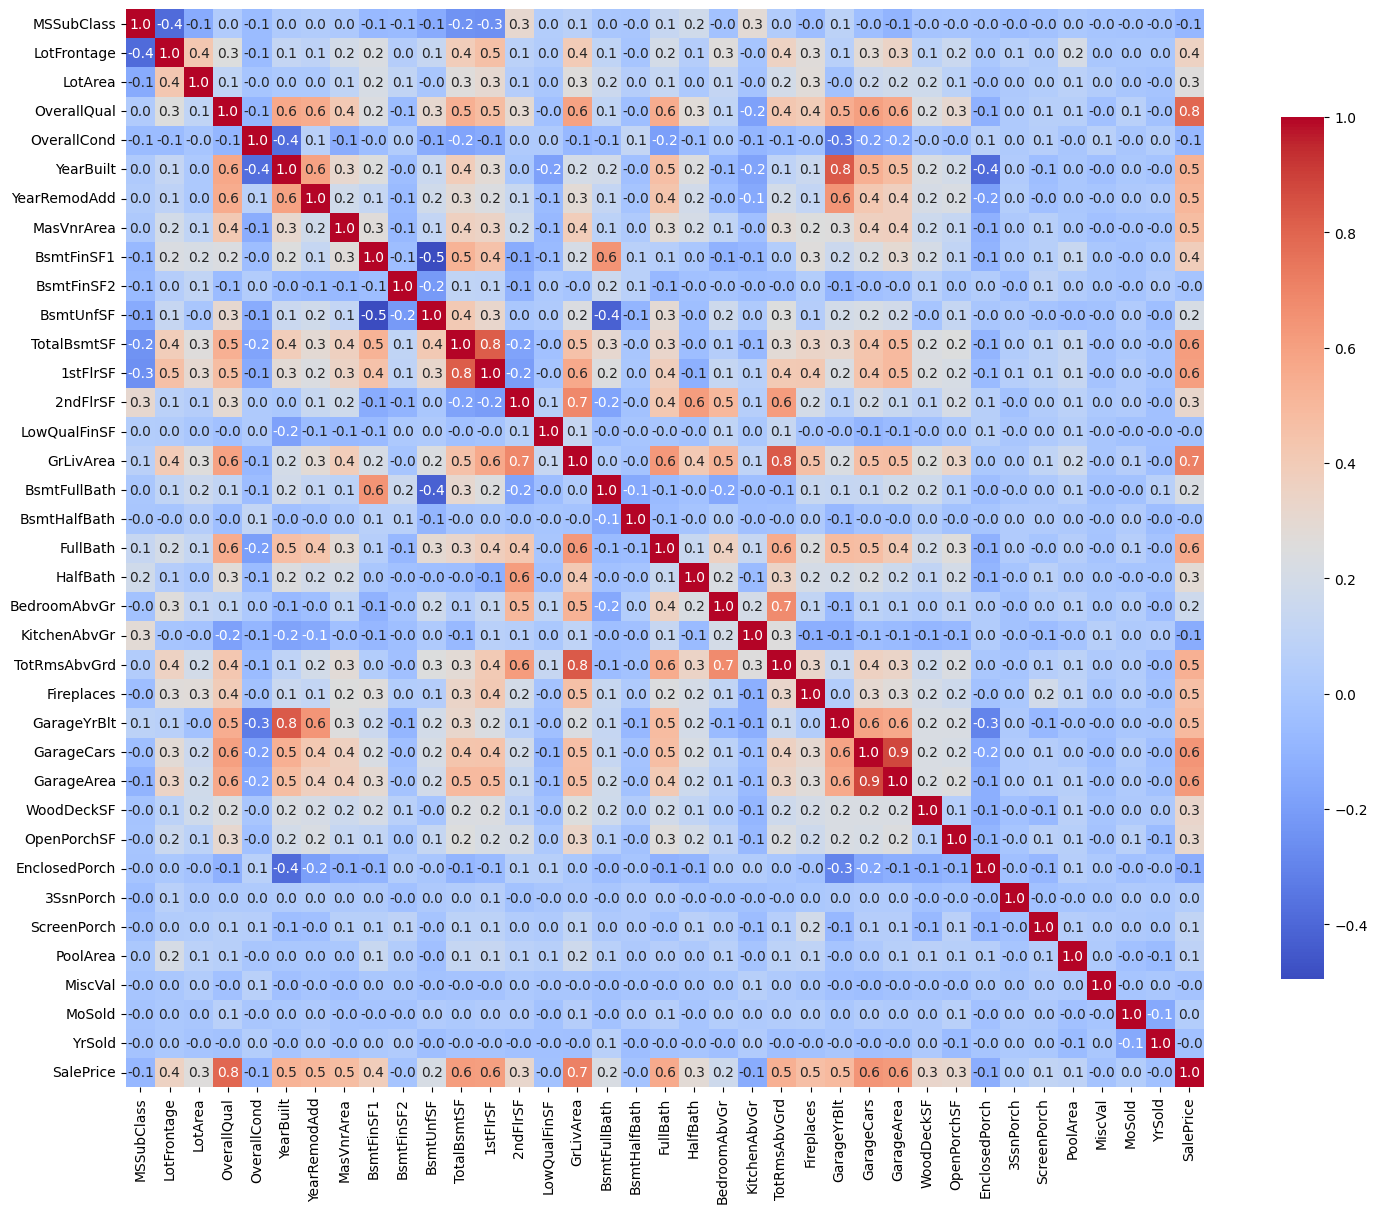

In [56]:
number_value = train_df.drop('Id', axis=1).select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20,14))
sns.heatmap(number_value, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

## Шаг 1
Точно к удалению:
1) GarageCArs


In [68]:
df = df.drop('GarageCars', axis=1)

## Шаг 2Выберем те значения, которые коррелируют боьше всего с ценой

In [90]:
fitchers = number_value['SalePrice'][number_value['SalePrice'] >= 0.5].keys()
fitchers = fitchers.drop('GarageCars')
fitchers

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice'], dtype='object')

## Потсроим на этих данных регрессию

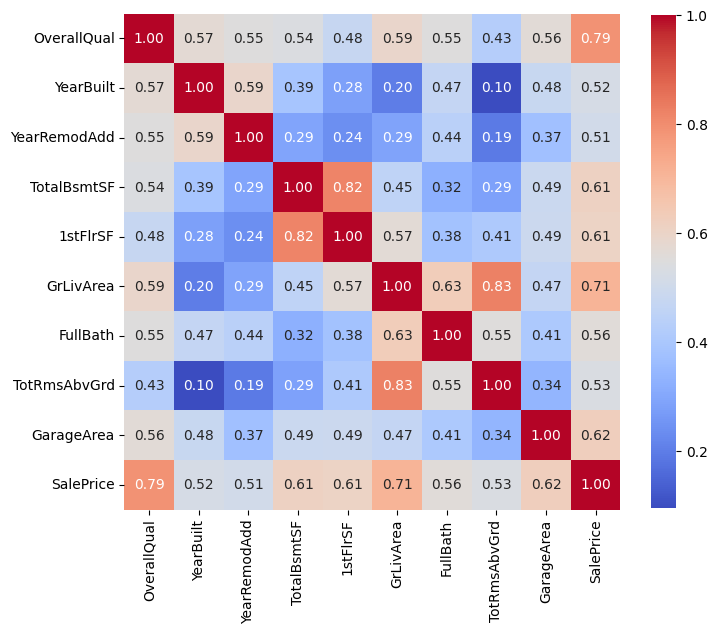

In [93]:
# train_df[fitchers].corr()

plt.figure(figsize=(8,8))
sns.heatmap(train_df[fitchers].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

In [94]:
# Удалим 1stFlrSF
fitchers = fitchers.drop('1stFlrSF')
fitchers

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice'], dtype='object')

In [95]:
X = train_df[fitchers[:-1]]
y = train_df[fitchers[1]]

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

In [118]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8.285970177115089e-26
R^2 Score: 1.0


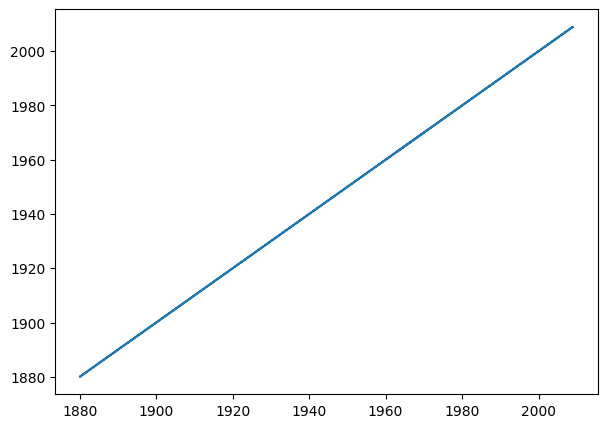

In [119]:
plt.figure(figsize=(7,5))
plt.plot(y_test, y_pred)
plt.show()

### проверка модели

In [134]:
test2 = pd.read_csv('test.csv')
X2 = test2[fitchers[:-1]]
y2_test2 = pd.read_csv('sample_submission.csv')
y2_test2 = y2_test2.drop('Id', axis=1)

In [135]:
union_df = pd.concat([X2, y2_test2], axis=1)
union_df = union_df.dropna()

X2 = union_df.drop('SalePrice', axis=1)
y2_test2 = union_df['SalePrice']

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageArea      0
dtype: int64

In [138]:
# X2_scaled = scaler.fit_transform(X2)

# Предсказание на тестовой выборке
y_pred_2 = model.predict(X2)

# Оценка качества модели
mse = mean_squared_error(y2_test2, y_pred_2)
r2 = r2_score(y2_test2, y_pred_2)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 31682777005.937984
R^2 Score: -115.17312882742017


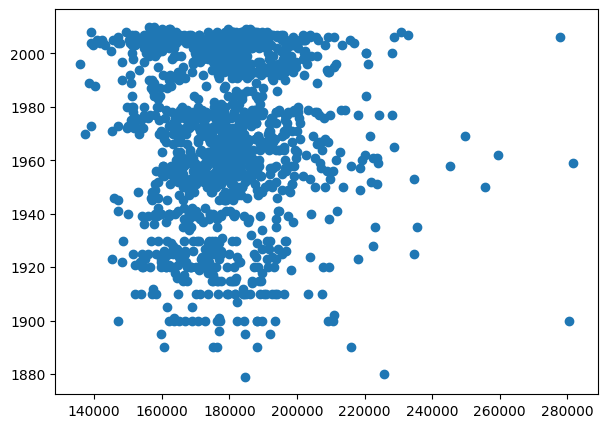

In [140]:
plt.figure(figsize=(7,5))
plt.scatter(y2_test2, y_pred_2)
plt.show()

## Данный подход плохо себя показал. Результаты модели 1
Mean Squared Error: 31682777005.937984\
R^2 Score: -115.17312882742017

# Подход 2

пробуем взять все численные переменные и их занулить с помощью регуляризации 

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_df.select_dtypes(include=[np.number]), train_size=0.7, test_size=0.3, random_state=42)
validation = pd.read_csv('test.csv')

In [10]:
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']

X_test = test.drop(['Id', 'SalePrice'], axis=1)
y_test = test['SalePrice']

In [18]:
X_train.interpolate(inplace=True)
X_test.interpolate(inplace=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def normalize_data(type: str, train_data: pd.DataFrame, test_data: pd.DataFrame = None):
    if type == 'MinMaxScaler':
        standartisation = MinMaxScaler()
    if type == 'StandardScaler':
        standartisation = StandardScaler()

    standartisation.fit(train_data)
    train_result = pd.DataFrame(standartisation.transform(train_data), columns=train_data.columns)

    if test_data is not None:
        test_result = pd.DataFrame(standartisation.transform(test_data), columns=test_data.columns)
        return(train_result, test_result)
    return(train_result)



In [21]:


X_train_MinMax, X_test_MinMax = normalize_data(type = 'MinMaxScaler', train_data = X_train, test_data = X_test)

X_train_StandardScaler, X_test_StandardScaler = normalize_data(type = 'StandardScaler', train_data = X_train, test_data = X_test)

После MinMax построим моедли и замерим качество этих моедлей

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [25]:
def cheak_models(X_train, y_train, X_test, y_test):
    models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor()]
    for model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        print(f'Model {str(model)}')
        print(f'Mean Root Squared Error Train: {mean_squared_error(y_train, y_pred_train)**0.5}')
        print(f'R^2 Score Train: {r2_score(y_train, y_pred_train)}')
        print(f'Mean Root Squared Error Test: {mean_squared_error(y_test, y_pred_test)**0.5}')
        print(f'R^2 Score Test: {r2_score(y_test, y_pred_test)}')
        print('='*100)

        
cheak_models(X_train_MinMax, y_train, X_test_MinMax, y_test)
# результат с Minmax данными

Model LinearRegression()
Mean Root Squared Error Train: 34573.9279865828
R^2 Score Train: 0.8015814090349329
Mean Root Squared Error Test: 35265.94922996663
R^2 Score Test: 0.8217726477032642
Model Ridge()
Mean Root Squared Error Train: 34690.936194353875
R^2 Score Train: 0.8002361242533347
Mean Root Squared Error Test: 35455.35392572397
R^2 Score Test: 0.8198530766331897
Model Lasso()
Mean Root Squared Error Train: 34574.00536469099
R^2 Score Train: 0.8015805208933029
Mean Root Squared Error Test: 35266.553010652766
R^2 Score Test: 0.8217665448671521
Model ElasticNet()
Mean Root Squared Error Train: 62564.808758793675
R^2 Score Train: 0.35025169102223763
Mean Root Squared Error Test: 67874.5276941811
R^2 Score Test: 0.33979799246950415
Model DecisionTreeRegressor()
Mean Root Squared Error Train: 0.0
R^2 Score Train: 1.0
Mean Root Squared Error Test: 39200.34927178176
R^2 Score Test: 0.7797869395749086


In [26]:
cheak_models(X_train_StandardScaler, y_train, X_test_StandardScaler, y_test)
# результат с StandardScaler данными

Model LinearRegression()
Mean Root Squared Error Train: 34575.10214896346
R^2 Score Train: 0.8015679318505494
Mean Root Squared Error Test: 35267.683149013516
R^2 Score Test: 0.8217551214829499
Model Ridge()
Mean Root Squared Error Train: 34573.97677121491
R^2 Score Train: 0.8015808490878655
Mean Root Squared Error Test: 35260.487277210814
R^2 Score Test: 0.821827850754045
Model Lasso()
Mean Root Squared Error Train: 34573.92894080326
R^2 Score Train: 0.8015813980824555
Mean Root Squared Error Test: 35265.63932003316
R^2 Score Test: 0.821775780140383
Model ElasticNet()
Mean Root Squared Error Train: 36213.16793070306
R^2 Score Train: 0.782320288955423
Mean Root Squared Error Test: 36576.06256424204
R^2 Score Test: 0.8082845547029066
Model DecisionTreeRegressor()
Mean Root Squared Error Train: 0.0
R^2 Score Train: 1.0
Mean Root Squared Error Test: 39123.27637906135
R^2 Score Test: 0.7806520223043857


c:\Users\razum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.877e+09, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


### Поробуем модель Ridge c измен alpha

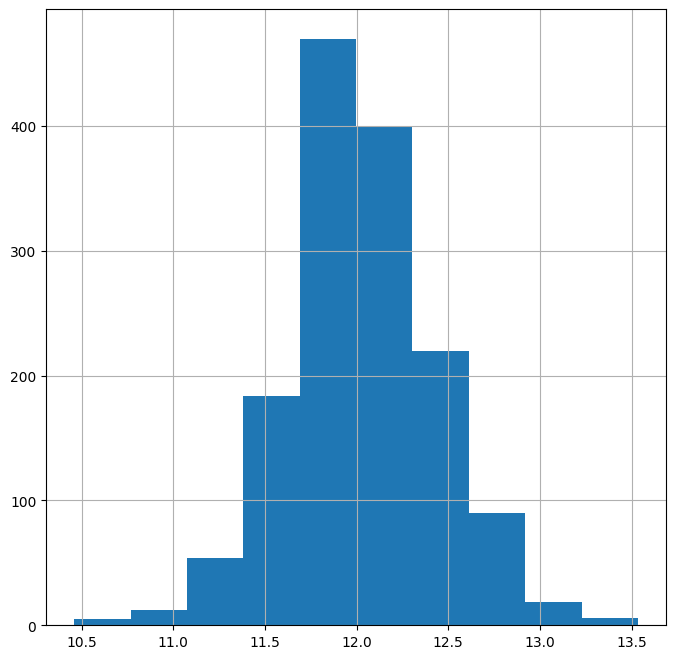

In [35]:
plt.figure(figsize=(8,8))
plt.hist(np.log(train_df['SalePrice']))
plt.grid(True)
plt.show()

In [36]:
y_train_log, y_test_log = np.log(y_train), np.log(y_test)
model = Ridge()
model.fit(X_train_StandardScaler, y_train_log)

y_pred_train = model.predict(X_train_StandardScaler)
y_pred_test = model.predict(X_test_StandardScaler)

print(f'Model {str(model)}')
print(f'Mean Root Squared Error Train: {mean_squared_error(y_train_log, y_pred_train)**0.5}')
print(f'R^2 Score Train: {r2_score(y_train_log, y_pred_train)}')
print(f'Mean Root Squared Error Test: {mean_squared_error(y_test_log, y_pred_test)**0.5}')
print(f'R^2 Score Test: {r2_score(y_test_log, y_pred_test)}')

Model Ridge()
Mean Root Squared Error Train: 0.1457927252892843
R^2 Score Train: 0.8630055480090645
Mean Root Squared Error Test: 0.148800147703465
R^2 Score Test: 0.8694843236958437


In [45]:
parameters = np.linspace(0.001, 100, 100)
result = []
columns = ['alpha', 'Mean Root Squared Error Train', 'R^2 Score Train', 'Mean Root Squared Error Test', 'R^2 Score Test']
for alpha in parameters:
    model = Ridge(alpha)
    model.fit(X_train_StandardScaler, y_train_log)

    y_pred_train = model.predict(X_train_StandardScaler)
    y_pred_test = model.predict(X_test_StandardScaler)

    result.append([alpha, (mean_squared_error(y_train_log, y_pred_train)**0.5), r2_score(y_train_log, y_pred_train), 
    (mean_squared_error(y_test_log, y_pred_test)**0.5), r2_score(y_test_log, y_pred_test)])

result_df = pd.DataFrame(result, columns=columns)
result_df

,alpha,Mean Root Squared Error Train,R^2 Score Train,Mean Root Squared Error Test,R^2 Score Test
0,0.001000,0.145792,0.863006,0.148837,0.869420
1,1.011091,0.145793,0.863006,0.148800,0.869485
2,2.021182,0.145794,0.863004,0.148764,0.869548
3,3.031273,0.145795,0.863001,0.148729,0.869609
4,4.041364,0.145797,0.862997,0.148695,0.869669
5,5.051455,0.145800,0.862992,0.148662,0.869727
6,6.061545,0.145803,0.862986,0.148630,0.869783
7,7.071636,0.145807,0.862979,0.148598,0.869839
8,8.081727,0.145811,0.862971,0.148567,0.869892
9,9.091818,0.145816,0.862962,0.148538,0.869945


In [46]:
alpha = 96.969727
model = Ridge(alpha)
model.fit(X_train_StandardScaler, y_train_log)

Ridge(alpha=96.969727)

In [55]:
X_val = validation.select_dtypes(include=[np.number]).drop('Id', axis=1)
X_val.interpolate(inplace=True)
_, X_val_StandardScaler = normalize_data(type = 'StandardScaler', train_data = X_train, test_data=X_val)
# X_val_StandardScaler.head()

In [56]:
predict = model.predict(X_val_StandardScaler)
final_predictions = np.exp(predict)

In [59]:
#create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
#The first column must the contain the ID from the test data.
submission['Id'] = validation.Id
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119944.342943
1,1462,120587.953758
2,1463,171308.471214
3,1464,196872.734204
4,1465,177988.351310


In [60]:
submission.to_csv('submission2.csv', index=False)